In [1]:
import json
import importlib  
import os
import matplotlib.pyplot as plt
os.chdir(os.path.join('.', '..'))
import utils
import analysis_utils
import pandas as pd
import numpy as np
import re
import analysis_utils
analyze_data = importlib.import_module("analyze-data")

usr = os.path.expanduser('~')

dom_list = ["hotel", "taxi", "train", "restaurant", "attraction"]

split = "train" 
df = analyze_data.dials_as_frame(split, dom_list)


In [2]:
#pd.set_option('display.max_colwidth', -1)
def select_dialogue(frame, dial_id):
    return df[df["dialogue"]==dial_id]

def find_turns_with_text(frame, text):
    bool_frame = frame[["system_transcript", "transcript"]].apply(lambda x: x.str.contains(text, regex=False))
    select = frame[["system_transcript", "transcript"]][np.logical_or(bool_frame.system_transcript, bool_frame.transcript)]
    return select

## Plots

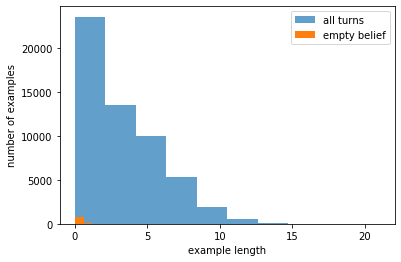

In [3]:
a = plt.hist(df.turn.values.astype(int), alpha=0.7, label='all turns', histtype='stepfilled')
b = plt.hist(df[df.full_belief.apply(len)==0].turn.values.astype(int), alpha=1, label='empty belief', histtype='stepfilled')
plt.legend(loc='upper right')
plt.xlabel("example length")
plt.ylabel("number of examples")
plt.show()

/usr/lib64/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


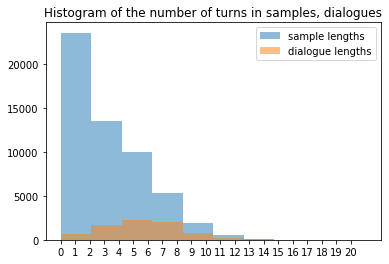

In [4]:
k = df[["dialogue", "turn"]]
k.turn = k.turn.astype(int)
dialogue_lengths = k.groupby("dialogue").max().values.astype(int)
sample_lengths = df["turn"].values.astype(int)

max_turn_len = max(df["turn"].values.astype(int))
plt.hist(sample_lengths, alpha=0.5, label='sample lengths', histtype='stepfilled')
plt.hist(dialogue_lengths, alpha=0.5, label='dialogue lengths', histtype='stepfilled')
plt.xticks(list(range(max_turn_len)))
plt.legend(loc='upper right')
plt.title('Histogram of the number of turns in samples, dialogues')
l = plt.plot()

In [ ]:
def get_full_belief(turn):
    dict_of_slots = fix_general_label_error(turn['belief_state'], False, ALL_SLOTS)
    return ['-'.join((el, dict_of_slots[el])) for el in dict_of_slots], list(dict_of_slots.keys())
data = baseline_test_set